# 课时5 基本自编码器的代码实现

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'1.13.1'

## 1. 导入MNIST数据集

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST', one_hot=False)

Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\train-labels-idx1-ubyte.gz
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\t10k-images-idx3-ubyte.gz
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


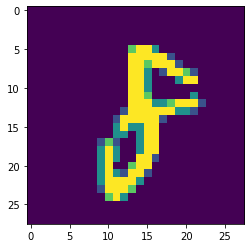

In [10]:
# 选取其中的一张图片进行展示
img = mnist.train.images[30]
plt.imshow(img.reshape((28,28)))

In [11]:
mnist.train.images.shape

(55000, 784)

In [12]:
# 定义自编码器中间的压缩层的神经元个数
hidden_units = 64
input_units = mnist.train.images.shape[1]

In [40]:
inputs = tf.placeholder(dtype=tf.float32, shape=[None, input_units], name='inputs')
targets = tf.placeholder(dtype=tf.float32, shape=[None, input_units], name='targets')

In [41]:
hidden = tf.layers.dense(inputs=inputs, units=hidden_units, activation=tf.nn.relu)

In [42]:
logits = tf.layers.dense(inputs=hidden, units=input_units, activation=None)
outputs = tf.sigmoid(logits, name='outputs')

In [43]:
loss = tf.reduce_sum(tf.square(outputs - inputs))

In [44]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

In [45]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [48]:
epochs = 10
batch_size = 128

In [49]:
for i in range(epochs):
    epoch_loss = []
    for x in range(mnist.train.num_examples // batch_size):
        batch = mnist.train.next_batch(batch_size=batch_size)
        batch_loss, _ = sess.run([loss, optimizer],
                                 feed_dict={inputs:batch[0],
                                            targets:batch[0]})
        epoch_loss.append(batch_loss)
    print('Epoch is %i'%(i+1), 'Training Loss is %.3f'%(sum(epoch_loss)/len(epoch_loss)))

Epoch is 1 Training Loss is 1427.307
Epoch is 2 Training Loss is 1396.781
Epoch is 3 Training Loss is 1371.188
Epoch is 4 Training Loss is 1362.615
Epoch is 5 Training Loss is 1317.431
Epoch is 6 Training Loss is 1306.270
Epoch is 7 Training Loss is 1289.932
Epoch is 8 Training Loss is 1275.231
Epoch is 9 Training Loss is 1257.690
Epoch is 10 Training Loss is 1239.579


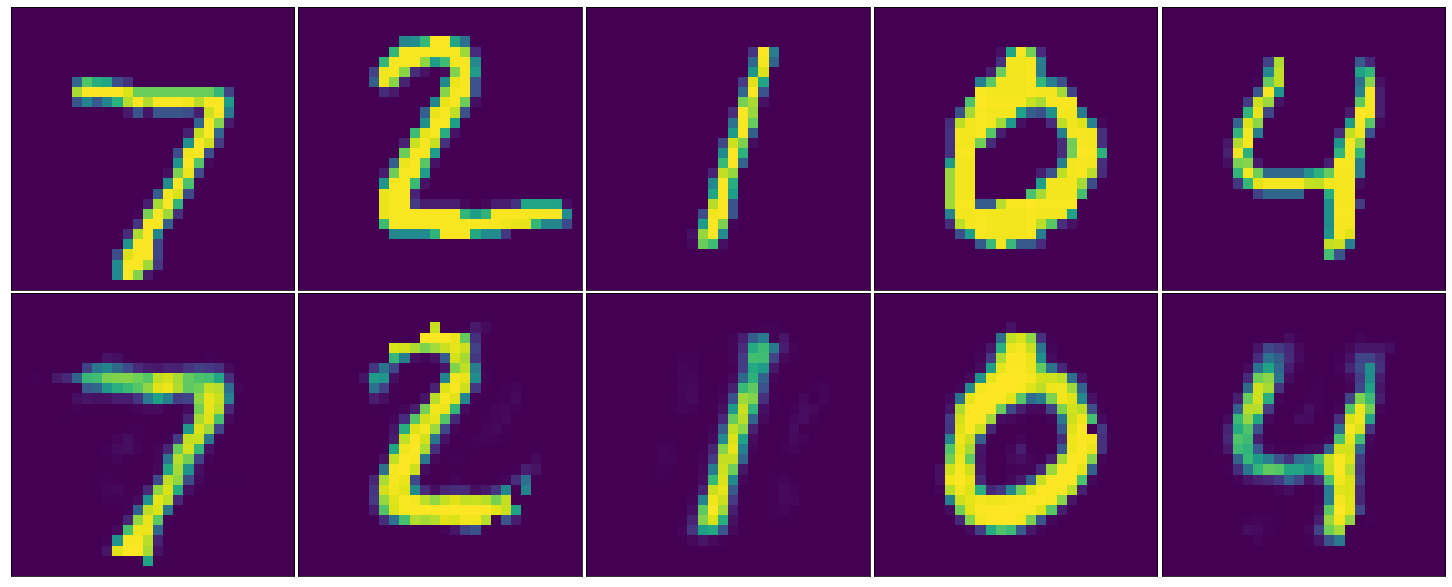

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20, 8))
test_imgs = mnist.test.images[:5]
reconstructed, compressed = sess.run([outputs, hidden], 
                                     feed_dict={inputs:test_imgs,
                                                targets:test_imgs})
for image, row in zip([test_imgs, reconstructed], ax):
    for img, ax in zip(image, row):
        ax.imshow(img.reshape((28, 28)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0.1)

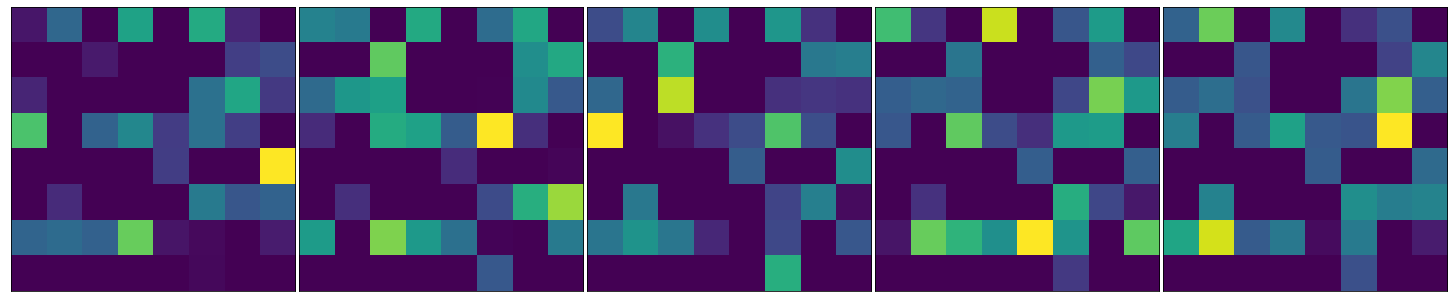

In [37]:
# 绘制出中间的压缩的向量的图像
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(20, 4))
for img, ax in zip(compressed, axes):
    ax.imshow(img.reshape((8, 8)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0)